<a href="https://colab.research.google.com/github/reillyn51/340wProject/blob/master/DS340W_Modified_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
!pwd

/content/drive/MyDrive


In [4]:
!git clone https://github.com/reillyn51/340wProject.git

fatal: destination path '340wProject' already exists and is not an empty directory.


In [5]:
!cd drive/MyDrive/

/bin/bash: line 0: cd: drive/MyDrive/: No such file or directory


In [53]:
import pandas as pd
import numpy as np
df = pd.read_csv('340wProject/data/Beat the bookies/closing_odds.csv')
df.head()

,match_id,league,match_date,home_team,home_score,away_team,away_score,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,max_odds_home_win,max_odds_draw,max_odds_away_win,top_bookie_home_win,top_bookie_draw,top_bookie_away_win,n_odds_home_win,n_odds_draw,n_odds_away_win
0,170088,England: Premier League,2005-01-01,Liverpool,0,Chelsea,1,2.9944,3.1944,2.2256,3.20,3.25,2.29,Paddy Power,Sportingbet,Expekt,9,9,9
1,170089,England: Premier League,2005-01-01,Fulham,3,Crystal Palace,1,1.9456,3.2333,3.6722,2.04,3.30,4.15,Pinnacle Sports,bet-at-home,Expekt,9,9,9
2,170090,England: Premier League,2005-01-01,Aston Villa,1,Blackburn,0,1.8522,3.2611,4.0144,2.00,3.40,4.50,Pinnacle Sports,Paddy Power,Sportingbet,9,9,9
3,170091,England: Premier League,2005-01-01,Bolton,1,West Brom,1,1.6122,3.4133,5.4722,1.67,3.57,6.27,Coral,Pinnacle Sports,Pinnacle Sports,9,9,9
4,170092,England: Premier League,2005-01-01,Charlton,1,Arsenal,3,5.9878,3.4778,1.5567,7.00,3.60,1.62,Expekt,Paddy Power,bet365,9,9,9


In [82]:
# calculate the Kelly criterion column
subset = df[['match_id','home_score','away_score','max_odds_home_win']]
subset['home_win'] = np.where(subset['home_score'] > subset['away_score'], True, False) # outcome column
subset['p_cons'] =  1/df['avg_odds_home_win'] #probability of an event happening
p_unfavorable_cons = 1 - subset['p_cons'] 
b = df['max_odds_home_win'] # ?
subset['kelly_criterion_percent'] = subset['p_cons'] - (p_unfavorable_cons / b)
subset['p_cons']

<ipython-input-82-ce688fa62e12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['home_win'] = np.where(subset['home_score'] > subset['away_score'], True, False) # outcome column
<ipython-input-82-ce688fa62e12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['p_cons'] =  1/df['avg_odds_home_win'] #probability of an event happening
<ipython-input-82-ce688fa62e12>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

0         0.333957
1         0.513980
2         0.539898
3         0.620270
4         0.167006
            ...   
479435    0.593895
479436    0.076240
479437    0.058053
479438    0.063636
479439    0.212112
Name: p_cons, Length: 479440, dtype: float64

In [83]:
# Calculating the expected payout for each game
alpha = .034 #constant that depends on victory (0.034 for home win)
omega = df['max_odds_home_win'] # odds paid out by the bookmaker
subset['E(pi)'] = (subset['p_cons'] - alpha) * omega-1 #
print(subset.shape, subset.columns)

(479440, 8) Index(['match_id', 'home_score', 'away_score', 'max_odds_home_win', 'home_win',
       'p_cons', 'kelly_criterion_percent', 'E(pi)'],
      dtype='object')


<ipython-input-83-368d3166f577>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['E(pi)'] = (subset['p_cons'] - alpha) * omega-1 #


In [84]:
from pickle import TRUE
# determining when to bet 
subset['place_bet'] = np.where(subset['E(pi)'] > 0, True, False) # outcome column
print(subset)

        match_id  home_score  away_score  max_odds_home_win  home_win  \
0         170088           0           1               3.20     False   
1         170089           3           1               2.04      True   
2         170090           1           0               2.00      True   
3         170091           1           1               1.67     False   
4         170092           1           3               7.00     False   
...          ...         ...         ...                ...       ...   
479435    876806           1           2               1.83     False   
479436    876807           1           1              19.00     False   
479437    876808           0           5              22.00     False   
479438    876809           0           3              34.00     False   
479439    876812           0           0               5.46     False   

          p_cons  kelly_criterion_percent     E(pi)  place_bet  
0       0.333957                 0.125818 -0.040138      F

<ipython-input-84-7ac0268a34a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['place_bet'] = np.where(subset['E(pi)'] > 0, True, False) # outcome column


In [105]:
# Calculate profit for Kelly criterion 
initial_wealth_2 = 500
wealth_2 = []
subset_2 = subset
starting_salary = initial_wealth_2 * len(subset_2)
for i in range(len(subset)):
  
  if subset['place_bet'][i] == True: 
    if subset['home_win'][i] == True:
      # bet won, wealth then gets increased by bet payout
        wealth_2.append(initial_wealth_2 * subset_2['kelly_criterion_percent'][i] * subset_2['max_odds_home_win'][i] + ( initial_wealth_2 - (initial_wealth_2 * subset_2['kelly_criterion_percent'][i])))
    else:
        wealth_2.append(initial_wealth_2 - (initial_wealth_2 * subset_2['kelly_criterion_percent'][i]))
      
  else:
      wealth_2.append(500)

subset['wealth'] = wealth_2

<ipython-input-105-288e29bd7a4f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['wealth'] = wealth_2


In [88]:
print(sum(subset_2['wealth']) - starting_salary)

319204.91723391414


In [89]:
# modern portfolio theory calculation
# change the place_bet to be different here

thresholds = [.5, .52, .54, .6, .625]
plotting_dictionary = {}
plot_types = ['.','o','p','*','^']
for threshold in thresholds:
  initial_wealth_mpt = 500
  wealth_mpt = []
  subset_mpt = subset
  place_bet_mpt = []
  # bet 1% of wealth on game if the outcome of the bet winning is greater than or equal increasing the wealth by 10% of the portfolio 
  for i in range(len(subset_mpt)):
    if len(wealth_mpt) == 0:
      percentage_increase = .01 * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i] / (initial_wealth_mpt + .01 * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i])
      if percentage_increase > threshold:
        place_bet_mpt.append(True)
        wealth_mpt.append(initial_wealth_mpt + .01 * initial_wealth_mpt * subset_mpt['max_odds_home_win'][i])
      else:
        place_bet_mpt.append(False)
    else:
      percentage_increase = .01 * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i] / (int(wealth_mpt[-1]) + .01 * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i])
      if percentage_increase > threshold:
        place_bet_mpt.append(True)
        wealth_mpt.append(int(wealth_mpt[-1]) + .01 * int(wealth_mpt[-1]) * subset_mpt['max_odds_home_win'][i])
      else:
        place_bet_mpt.append(False)

  # print(len(place_bet_mpt) == len(subset_mpt))
  # subset_mpt['place_bet_mpt'] = place_bet_mpt
  # print(wealth_mpt[0])
  index = thresholds.index(threshold)
  plotting_dictionary[plot_types[index]] = wealth_mpt
  # print(index)
  print(f'Wealth {wealth_mpt} for threshold {threshold}')

# add data to subset to keep track of it
# print(plotting_dictionary)
# print(wealth_mpt[-1])
# subset_mpt
# percentage_increase = initial_wealth_mpt * subset_mpt['max_odds_home_win'][i] / (sum(wealth_mpt) + initial_wealth_2 * subset_mpt['max_odds_home_win'][i])

Wealth [1005.0, 2020.0500000000002, 4060.2, 8160.6, 16401.6, 32966.009999999995, 66261.66, 133184.61, 267699.83999999997, 538074.99, 1081528.74, 2703820.0, 8355885.328, 16795328.85, 33758609.28, 71760675.1513, 180119294.25, 362039780.94, 727699957.8, 1826526892.07, 4584582498.92, 10361156445.48, 20825924454.45, 41860108152.54, 94603844423.51999, 190153727290.22998, 429747423675.4, 863792321586.75] for threshold 0.5
Wealth [1250.0, 3863.0, 8211.579099999999, 20609.61, 51728.59, 129837.28, 293431.62, 663154.06, 1498728.04] for threshold 0.52
Wealth [1250.0, 3863.0, 9696.130000000001, 24336.96, 61083.36, 138047.58000000002, 311986.22, 705088.3600000001] for threshold 0.54
Wealth [1545.2, 3877.9500000000003, 9731.27, 24424.809999999998] for threshold 0.6
Wealth [1545.2] for threshold 0.625


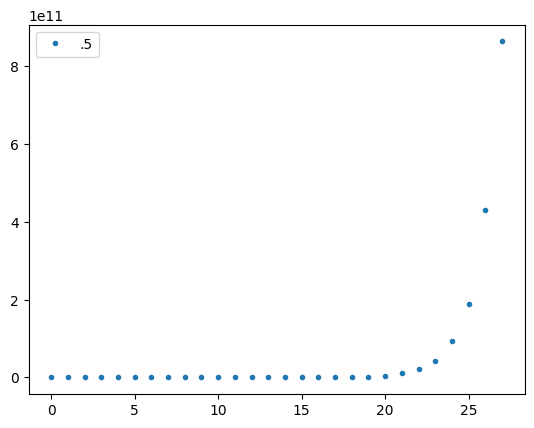

In [90]:
import matplotlib.pyplot as plt

plt.plot(plotting_dictionary['.'], '.', label='.5')
plt.legend(loc='upper left')

plt.show()

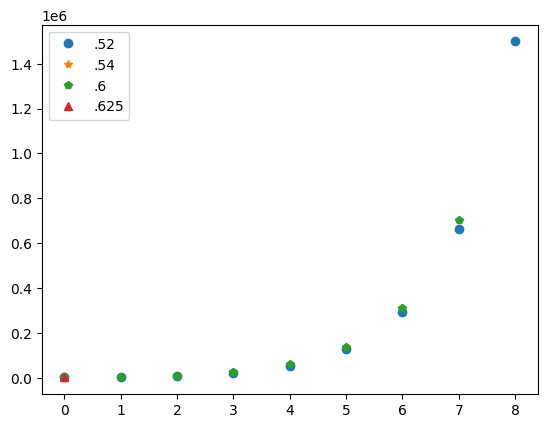

In [91]:
plt.plot(plotting_dictionary['o'], 'o', label='.52')
plt.plot(plotting_dictionary['*'], '*', label='.54')
plt.plot(plotting_dictionary['p'], 'p',label='.6')
plt.plot(plotting_dictionary['^'], '^', label='.625')
plt.legend(loc='upper left')
plt.show()

In [92]:
# Maximum kelly fractional criterion calculation
subset['kelly_frac_max'] = np.where(subset['kelly_criterion_percent'] < 0.5, True, False) # outcome column
display(subset)


<ipython-input-92-669af423755d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['kelly_frac_max'] = np.where(subset['kelly_criterion_percent'] < 0.5, True, False) # outcome column


,match_id,home_score,away_score,max_odds_home_win,home_win,p_cons,kelly_criterion_percent,E(pi),place_bet,kelly_frac_max,wealth
0,170088,0,1,3.20,False,0.333957,0.125818,-0.040138,False,True,500.000000
1,170089,3,1,2.04,True,0.513980,0.275735,-0.020840,False,True,500.000000
2,170090,1,0,2.00,True,0.539898,0.309848,0.011797,True,True,654.923874
3,170091,1,1,1.67,False,0.620270,0.392887,-0.020928,False,True,500.000000
4,170092,1,3,7.00,False,0.167006,0.048007,-0.068956,False,True,500.000000
...,...,...,...,...,...,...,...,...,...,...,...
479435,876806,1,2,1.83,False,0.593895,0.371979,0.024607,True,True,314.010334
479436,876807,1,1,19.00,False,0.076240,0.027621,-0.197443,False,True,500.000000
479437,876808,0,5,22.00,False,0.058053,0.015237,-0.470831,False,True,500.000000
479438,876809,0,3,34.00,False,0.063636,0.036096,0.007634,True,True,481.951901


In [93]:
# Calculate profit for maximum kelly criterion

initial_wealth_kfm = 500
wealth_kfm = []
subset_kfm = subset
starting_salary = initial_wealth_kfm * len(subset_kfm)
for i in range(len(subset_kfm)):
  if subset['place_bet'][i] == True: 
    if subset['kelly_frac_max'][i] == True: 
      if subset['home_win'][i] == True:
      # bet won, wealth then gets increased by bet payout
          wealth_kfm.append(initial_wealth_kfm * subset_kfm['kelly_criterion_percent'][i] * subset_kfm['max_odds_home_win'][i] + ( initial_wealth_kfm - (initial_wealth_kfm * subset_kfm['kelly_criterion_percent'][i])))
      else:
        wealth_kfm.append(initial_wealth_kfm - (initial_wealth_kfm * subset_kfm['kelly_criterion_percent'][i]))
    else:
        wealth_kfm.append(500)
  else:
    wealth_kfm.append(500)
subset_kfm['wealth'] = wealth_kfm

<ipython-input-93-ed6720a3057d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_kfm['wealth'] = wealth_kfm


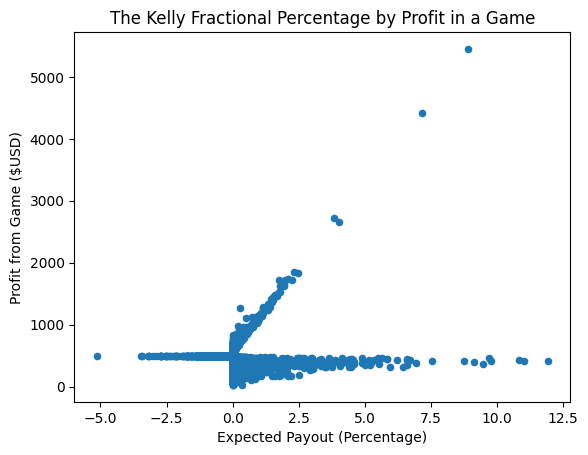

In [107]:
subset.plot(x='E(pi)', y='wealth', kind='scatter')
plt.xlabel('Expected Payout (Percentage)')
plt.ylabel('Profit from Game ($USD)')
plt.title('The Kelly Fractional Percentage by Profit in a Game')
plt.show()

In [80]:
subset = subset[subset['place_bet'] == True]
subset

,match_id,home_score,away_score,max_odds_home_win,home_win,p_cons,kelly_criterion_percent,E(pi),place_bet,wealth,kelly_frac_max
2,170090,1,0,2.00,True,0.539898,0.309848,0.011797,True,654.923874,True
20,170108,1,1,2.00,False,0.534388,0.301582,0.000776,True,349.209106,True
24,170112,2,1,1.74,True,0.628496,0.414988,0.034423,True,653.545548,True
36,170124,2,1,1.74,True,0.618123,0.398654,0.016375,True,647.502000,True
48,170136,0,2,2.00,False,0.537634,0.306452,0.007269,True,346.774194,True
...,...,...,...,...,...,...,...,...,...,...,...
479422,876792,3,0,1.53,True,0.696573,0.498254,0.013736,True,632.037435,True
479425,876795,6,0,1.95,True,0.547495,0.315441,0.001316,True,649.834699,True
479426,876796,3,1,1.50,True,0.704573,0.507621,0.005859,True,500.000000,False
479435,876806,1,2,1.83,False,0.593895,0.371979,0.024607,True,314.010334,True


In [52]:
print(sum(subset_kfm['wealth']) - starting_salary)
true_count_kelly_max = subset.kelly_frac_max.sum()
print(true_count_kelly_max)

169113.72534826398
113596
